In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

In [ ]:
!unzip drive/"My Drive"/FINAL_DATA.zip

Streaming output truncated to the last 5000 lines.
  inflating: FINAL_DATA/Elephant/Image_453.jpg  
  inflating: FINAL_DATA/Elephant/Image_454.jpg  
  inflating: FINAL_DATA/Elephant/Image_455.jpg  
  inflating: FINAL_DATA/Elephant/Image_456.jpg  
  inflating: FINAL_DATA/Elephant/Image_457.jpg  
  inflating: FINAL_DATA/Elephant/Image_458.jpg  
  inflating: FINAL_DATA/Elephant/Image_459.jpg  
  inflating: FINAL_DATA/Elephant/Image_460.jpg  
  inflating: FINAL_DATA/Elephant/Image_461.jpg  
  inflating: FINAL_DATA/Elephant/Image_462.jpg  
  inflating: FINAL_DATA/Elephant/Image_463.jpg  
  inflating: FINAL_DATA/Elephant/Image_464.jpg  
  inflating: FINAL_DATA/Elephant/Image_465.jpg  
  inflating: FINAL_DATA/Elephant/Image_466.jpg  
  inflating: FINAL_DATA/Elephant/Image_467.jpg  
  inflating: FINAL_DATA/Elephant/Image_468.jpg  
  inflating: FINAL_DATA/Elephant/Image_469.jpg  
  inflating: FINAL_DATA/Elephant/Image_470.jpg  
  inflating: FINAL_DATA/Elephant/Image_471.jpg  
  inflating: FINAL

In [ ]:
input_folder = "/content/FINAL_DATA"
output_folder = "/content/drive/MyDrive/TTV_DATA"
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(.8,.1,.1))


NameError: ignored

In [ ]:
help(splitfolders.ratio)

NameError: ignored

In [28]:
from tensorflow.keras.layers import Conv2D, Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import  ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf

In [29]:
#height and input layer of resnet50
img_height, img_width = (224, 224)
batch_size = 32
targe_size=(img_height, img_width)

train_dir = r"/content/drive/MyDrive/TTV_DATA/train"
valid_dir = r"/content/drive/MyDrive/TTV_DATA/val"
test_dir = r"/content/drive/MyDrive/TTV_DATA/test"

In [30]:
#multiple Augmentation of images
#preprocessing funtion to normalise the image based on model architecture
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0)

#set as trainning DATA
train_generator = train_datagen.flow_from_directory(train_dir,
    targe_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
#set as validation DATA
valid_generator = train_datagen.flow_from_directory(valid_dir,
    targe_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')


Found 6400 images belonging to 20 classes.
Found 800 images belonging to 20 classes.


In [31]:
test_generator = train_datagen.flow_from_directory(valid_dir,
    targe_size,
    batch_size=1,
    class_mode='categorical',
    subset='training')

Found 800 images belonging to 20 classes.


In [32]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [33]:
print(train_generator.class_indices)


{'Algerian': 0, 'Arial': 1, 'Baloo 2': 2, 'Bembo': 3, 'Bodoni': 4, 'Calibry': 5, 'Calligraphy': 6, 'Elephant': 7, 'Gill sans': 8, 'Hind': 9, 'Martel': 10, 'Mukta': 11, 'News Gothic': 12, 'Noto Sans': 13, 'Poppins': 14, 'Rajdhani': 15, 'Tekko': 16, 'Times New Roman': 17, 'Yantramanav': 18, 'kalam': 19}


In [34]:
print(train_generator.num_classes)

20


In [38]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.93):
            print("\nReached 93% accuracy so cancelling training!")
            self.model.stop_training = True
    
callbacks = myCallback()

In [39]:
#defining the model
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

H= model.fit(train_generator, epochs = 30, callbacks=[callbacks])


Epoch 1/30
200/200 [==============================] - 67s 323ms/step - loss: 1.2545 - accuracy: 0.5952
Epoch 2/30
200/200 [==============================] - 64s 322ms/step - loss: 0.6926 - accuracy: 0.7491
Epoch 3/30
200/200 [==============================] - 65s 324ms/step - loss: 0.5339 - accuracy: 0.8012
Epoch 4/30
200/200 [==============================] - 65s 325ms/step - loss: 0.4720 - accuracy: 0.8252
Epoch 5/30
200/200 [==============================] - 65s 323ms/step - loss: 0.4204 - accuracy: 0.8427
Epoch 6/30
200/200 [==============================] - 65s 322ms/step - loss: 0.3724 - accuracy: 0.8628
Epoch 7/30
200/200 [==============================] - 64s 320ms/step - loss: 0.3713 - accuracy: 0.8631
Epoch 8/30
200/200 [==============================] - 64s 322ms/step - loss: 0.3325 - accuracy: 0.8745
Epoch 9/30
200/200 [==============================] - 64s 321ms/step - loss: 0.3322 - accuracy: 0.8748
Epoch 10/30
200/200 [==============================] - 64s 321ms/step - l

In [40]:
model.save('/content/drive/MyDrive/ResNet50_FINAL.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [43]:

test_loss, test_acc = model.evaluate(test_generator, verbose = 1)
print("\n Test accuracy is:", test_acc)
print("\n Test loss is:", test_loss)

800/800 [==============================] - 10s 13ms/step - loss: 0.2785 - accuracy: 0.9062

 Test accuracy is: 0.90625

 Test loss is: 0.27854636311531067


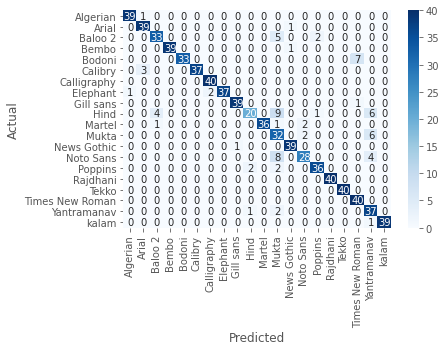

test accuracy : 90.375


In [45]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/ResNet50_FINAL.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predict_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predict_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum() * 100)))


In [46]:
H.history.keys()

dict_keys(['loss', 'accuracy'])

[Info] visualising model...


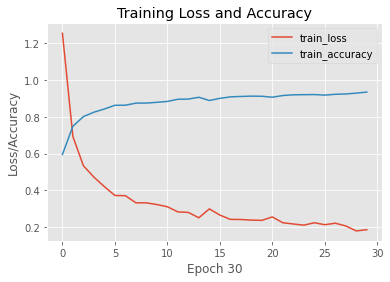

<Figure size 432x288 with 0 Axes>

In [47]:

matplotlib.use("Agg")
%matplotlib inline


print("[Info] visualising model...")
plt.style.use("ggplot")
plt.figure()
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["accuracy"], label="train_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch 30")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
plt.savefig("resnet50.png")